# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Gibran Malik Naabih Andito
- **Email:** gibranmalik55@gmail.com
- **ID Dicoding:** MC245D5Y0648

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola peminjaman sepeda sepanjang hari, dan bagaimana perbedaannya antara hari kerja dan akhir pekan?

2. Seberapa besar pengaruh cuaca, suhu, dan kelembaban terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [ ]:
# Load dataset
file_path = '/content/drive/MyDrive/Projek Akhir Belajar analisis data menggunakan python/hour.csv'

df = pd.read_csv(file_path)
df.head()

# Cek info dataset
print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- menambahkan data dengan melihat nilai yang hilang yang ternyata tidak ada

### Assessing Data

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah data duplikat: 0


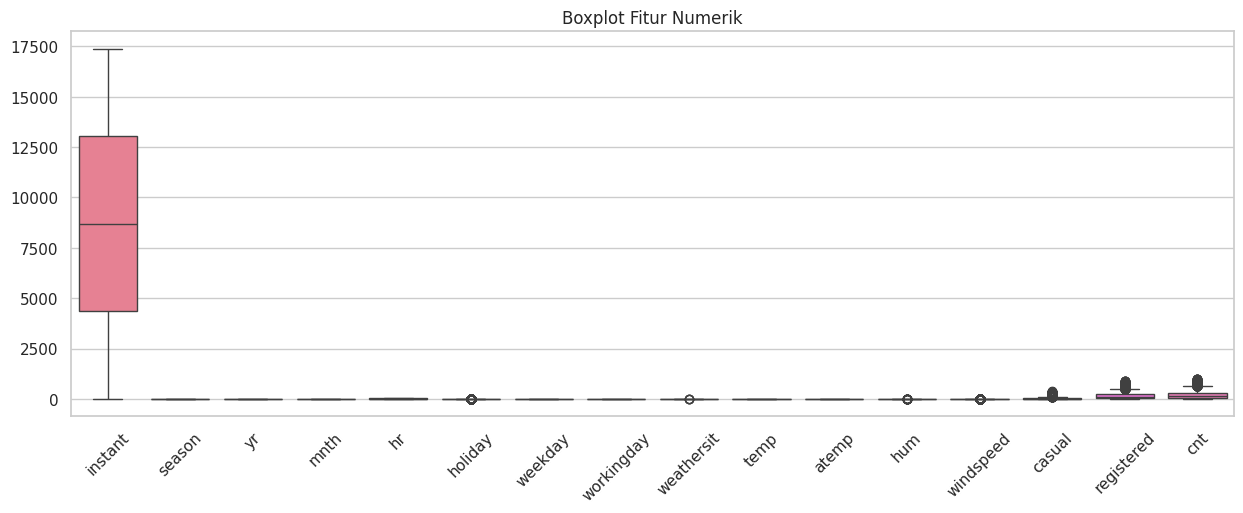

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Cek missing value
print(df.isnull().sum())

# Cek data duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

# Boxplot untuk mendeteksi outlier
datanum=df.select_dtypes(include='number')
plt.figure(figsize=(15, 5))
sns.boxplot(datanum)
plt.title("Boxplot Fitur Numerik")
plt.xticks(rotation=45)
plt.show()

df.describe()

**Insight:**
- dapat dilihat bahwa tidak ada nilai yang hilang
- tidak terdapat nilai yang duplikat
- terdapat beberapa kolom yang memiliki outlier seperti 'holiday', 'weathersit', 'hum', 'windspeed', 'casual', 'registered', 'cnt'

### Cleaning Data

In [ ]:
# Deteksi dan Penanganan Outlier (Metode IQR)
numerical_cols = ['holiday', 'weathersit', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

print("\nJumlah data sebelum outlier removal:", df.shape)
df = remove_outliers_iqr(df, numerical_cols)
print("Jumlah data setelah outlier removal:", df.shape)

# Mapping label kategori
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}

df['season'] = df['season'].map(season_map)
df['weathersit'] = df['weathersit'].map(weather_map)


Jumlah data sebelum outlier removal: (17379, 17)
Jumlah data setelah outlier removal: (14534, 17)


**Insight:**
- data yang memiliki outlier dihapuskan untuk outliernya
- menambahkan kolom untuk penamaan musim dan cuaca

## Exploratory Data Analysis (EDA)

### Explore ...

In [94]:
# Pastikan kolom tanggal sudah dalam format datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Menambahkan kolom nama hari (dalam bahasa Inggris)
df['day_name'] = df['dteday'].dt.day_name()

# Jika ingin dalam Bahasa Indonesia
day_map = {
    'Monday': 'Senin',
    'Tuesday': 'Selasa',
    'Wednesday': 'Rabu',
    'Thursday': 'Kamis',
    'Friday': 'Jumat',
    'Saturday': 'Sabtu',
    'Sunday': 'Minggu'
}
df['Hari'] = df['day_name'].map(day_map)

df.drop('day_name', axis=1, inplace=True)

# Cek hasilnya
df.head()

df.groupby(by="Hari").agg({
    "weekday": "count",
    "cnt": ["max", "min", "mean", "std"]
})

df.groupby(by="hr").agg({
    "weekday": "count",
    "cnt": ["max", "min", "mean", "std"]
})

df.groupby(['Hari', 'hr']).agg({
    'weekday': 'count',    # Bisa dianggap sebagai jumlah data (frekuensi jam itu muncul)
    'cnt': ['max', 'min', 'mean', 'std']
}).rename(columns={'weekday': 'count'})

season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

df['musim'] = df['season'].map(season_map)

df.groupby(by="musim").agg({
    "temp": "mean",
    "cnt": ["max", "min", "mean", "std"],
    "hum": ["max", "min", "mean", "std"]
})

temp  cnt                              hum                  \
            mean  max min        mean         std  max   min      mean   
musim                                                                    
Fall    0.706410  977   1  236.016237  197.711630  1.0  0.16  0.633167   
Spring  0.299147  801   1  111.114569  119.224010  1.0  0.00  0.581348   
Summer  0.544663  957   1  208.344069  188.362473  1.0  0.16  0.627022   
Winter  0.423138  967   1  198.868856  182.967972  1.0  0.16  0.667124   

                  
             std  
musim             
Fall    0.177866  
Spring  0.199403  
Summer  0.205364  
Winter  0.178149

**Insight:**
- dapat dilihat bahwa terjadi lonjakan disaat suhu tertentu dan di jam tertentu saja

## Visualization & Explanatory Analysis

### Pertanyaan 1:

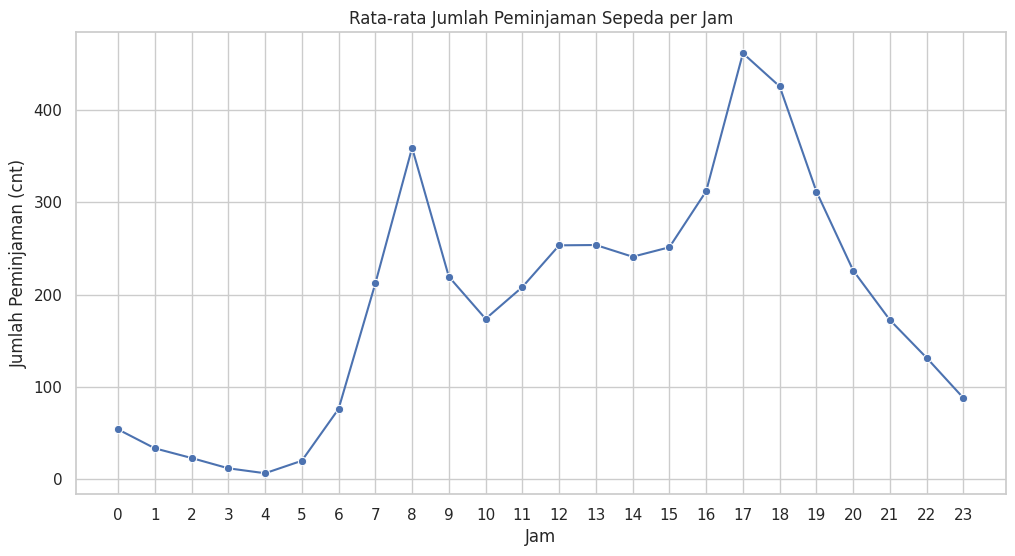

<ipython-input-84-57e6d68c5945>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='hr', y='cnt', hue='day_type', ci=None)


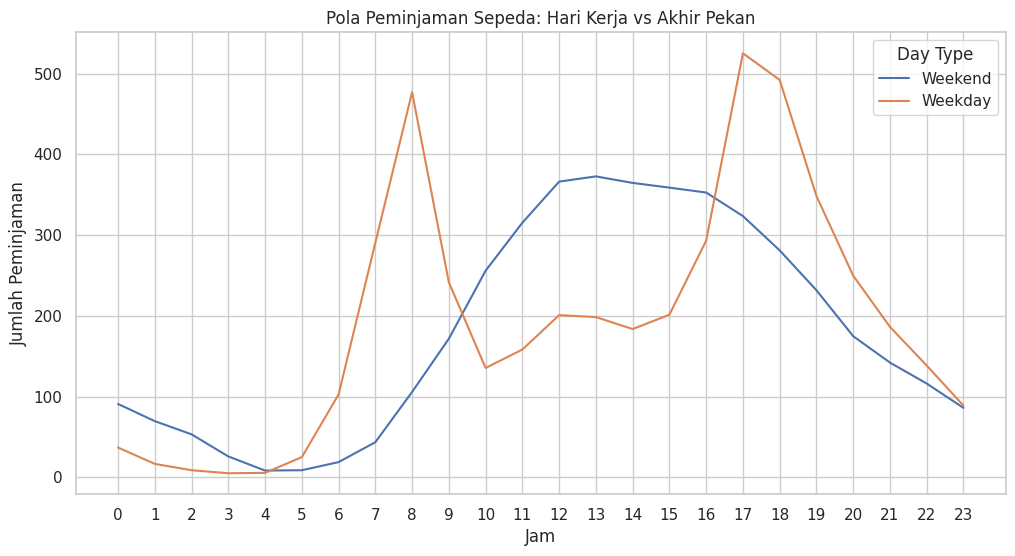

In [84]:
# Visualisasi sebelumnya
hourly_rentals = df.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt', marker='o')
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.xticks(range(0, 24))
plt.show()

df['day_type'] = df['workingday'].map({1: 'Weekday', 0: 'Weekend'})

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hr', y='cnt', hue='day_type', ci=None)
plt.title('Pola Peminjaman Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.legend(title='Day Type', labels=df['day_type'].unique())
plt.show()

### Pertanyaan 2:

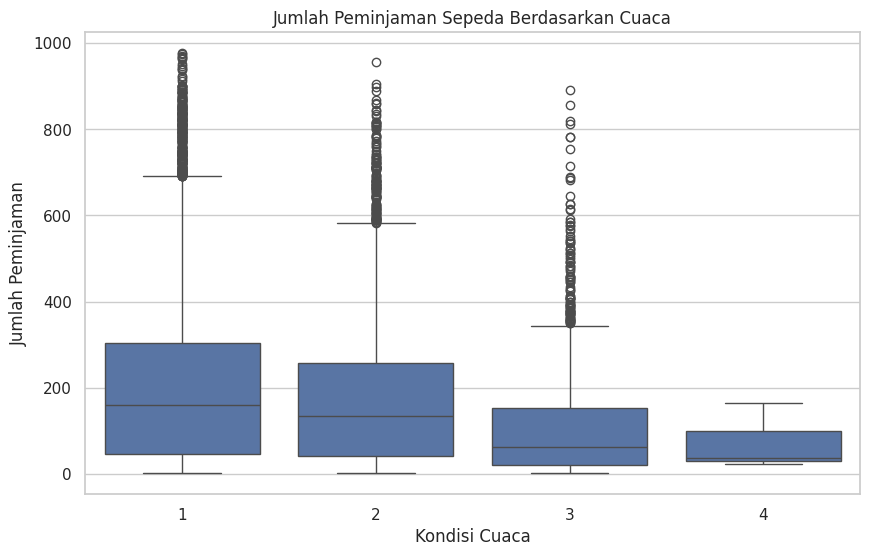

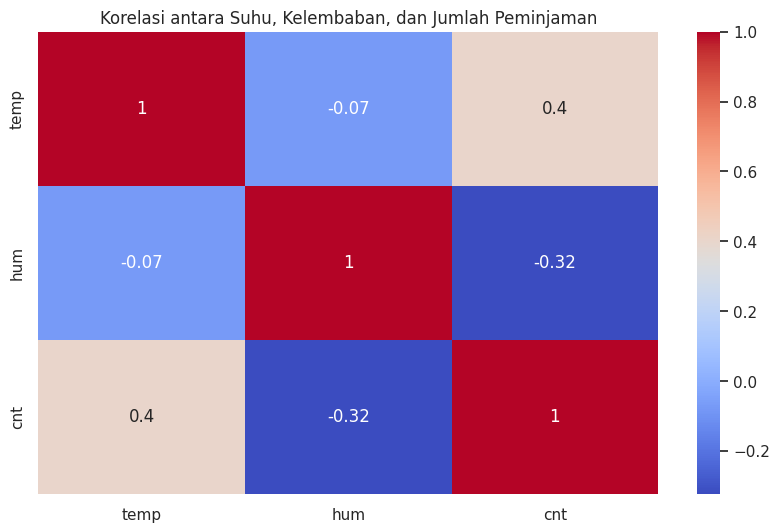

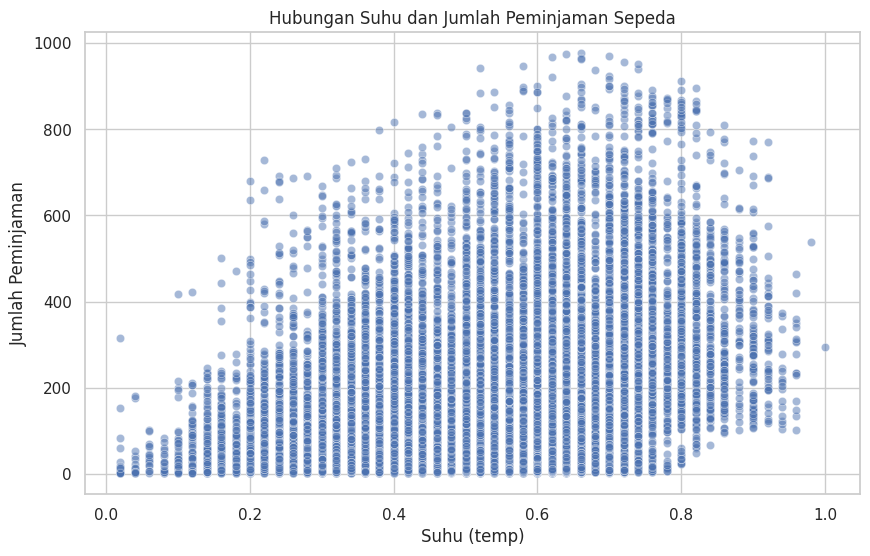

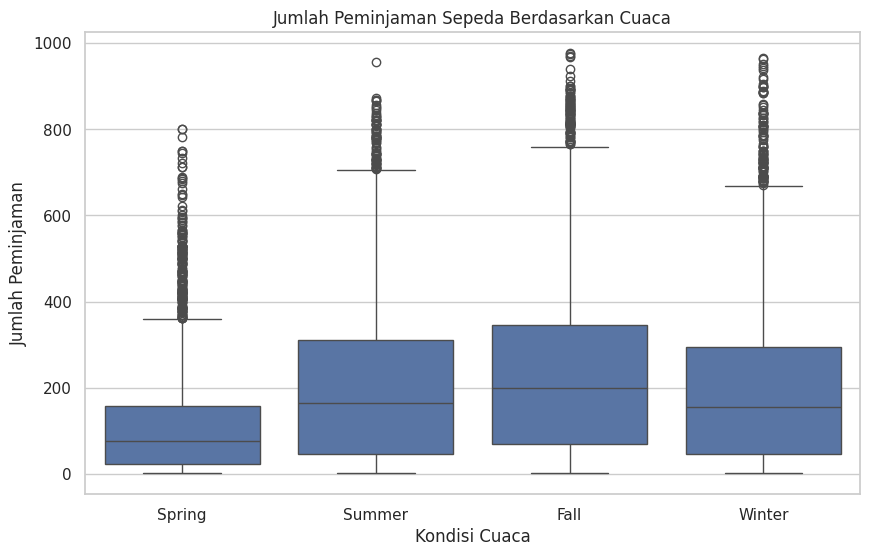

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weathersit', y='cnt')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df[['temp', 'hum', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Suhu, Kelembaban, dan Jumlah Peminjaman')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='cnt', alpha=0.5)
plt.title('Hubungan Suhu dan Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='musim', y='cnt')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- dapat dilihat bahwa lonjakan terjadi pada hari minggu dan juga di jam tertentu saja
- jumlah peminjaman sepeda dengan suhu memiliki kolerasi yang cukup kuat, dapat dilihat bahwa di range 0.4-0.6 terjadi lonjakan yang banyak. sedangkan jika terlalu tinggi atau terlalu rendah mengalami penurunan

## Analisis Lanjutan (Opsional)

## Conclusion

pertanyaan

1 Pola peminjaman sepeda sepanjang hari dan perbedaan hari kerja vs akhir pekan.

2 Pengaruh cuaca, suhu, dan kelembaban terhadap jumlah peminjaman sepeda.

jawaban

Conclution pertanyaan 1

didapati bahwa hari dan jam juga mempengaruhi peminjaman sepeda, pada grafik terlihat bahwa hari kerja terjadi peningkatan lebih banyak yang meminjam sepeda dibandingkan hari libur yang lebih merata. persebaran pada weekday melonjak di jam-jam tertentu berbanding terbalik dengan weekend yang lebih tersebar.

Conclution pertanyaan 2

peminjaman ini ada kolerasi dengan cuaca dan juga dengan tempratur/suhu. jika cuaca bagus dan tempratur/suhu yang pas, akan banyak yang meminjam sepedanya. sedangkan jika cuacanya buruk dan memiliki tempratur/suhu yang terlalu tinggi/rendah akan sedikit yang meminjam sepeda. musim juga berpengaruh pada peminjaman sepeda